# Navigator

### 1.1 [Geospatial Analysis](#1.1) 
### 1.2 [Scatter Plot ](#1.2) to identify relationshop between variables
### 2.1 [Linear Regression](#2.1)   
### 2.2 [Feature Engineering](#2.2)   
### 2.3 [Cross-Validation](#2.3)   


# 1. Exploratory Data Analysis
*[fetch_california_housing from scikit-learn]*

Objective: Analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods

**Variables:**
* MedInc: Median income in the block.
* HouseAge: Median age of the house.
* AveRooms: Average number of rooms per household.
* AveOccup: Average number of occupants per household.
* Latitude: Latitude of the block.
* Longitude: Longitude of the block.
* Population: Population of the block.
* MedHouseVal: Median house value (target variable).

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Create a DataFrame from the dataset
housing = fetch_california_housing()

df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [3]:
# First 5 rows of data
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Geospatial Analysis<a id='1.1'></a>

Objective: Analyze the impact of geographical location (latitude and longitude) on housing prices.

**Geospatial Visualization:**
Plot housing prices on a map to visualize spatial patterns.
Analyze the relationship between location and median house values.

**Feature Importance:**
Assess how latitude and longitude contribute to the prediction of housing prices.

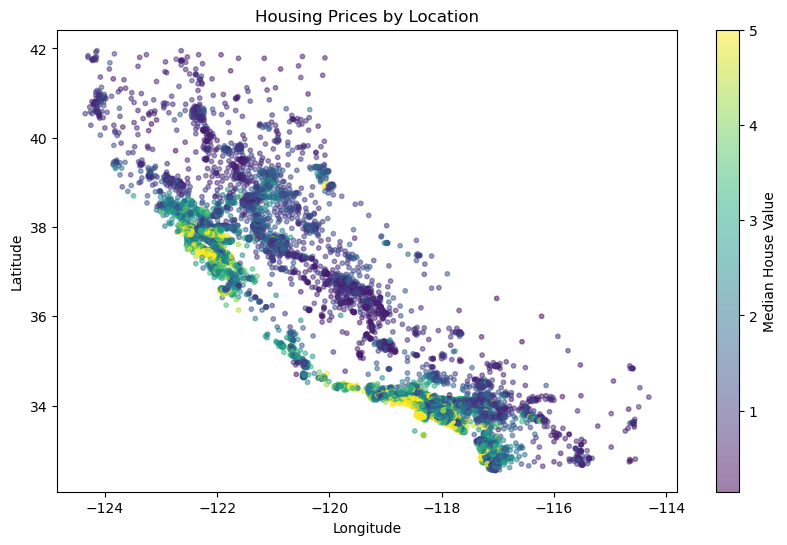

In [4]:
# Plot median house values by latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='viridis', s=10, alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices by Location')
plt.show()

## Scatter Plot to visualize the relationship between each variable and the dependent variable<a id='1.2'></a>

Objective: Understand the linearity or non-linearity of relationships and identify which features might be more predictive of the target variable.

This approach efficiently visualizes the relationships between each feature and the target variable in a side-by-side layout, making it easier to compare and interpret the scatter plots. Adjust the number of columns and the figure size as needed based on the number of features and your specific requirements.

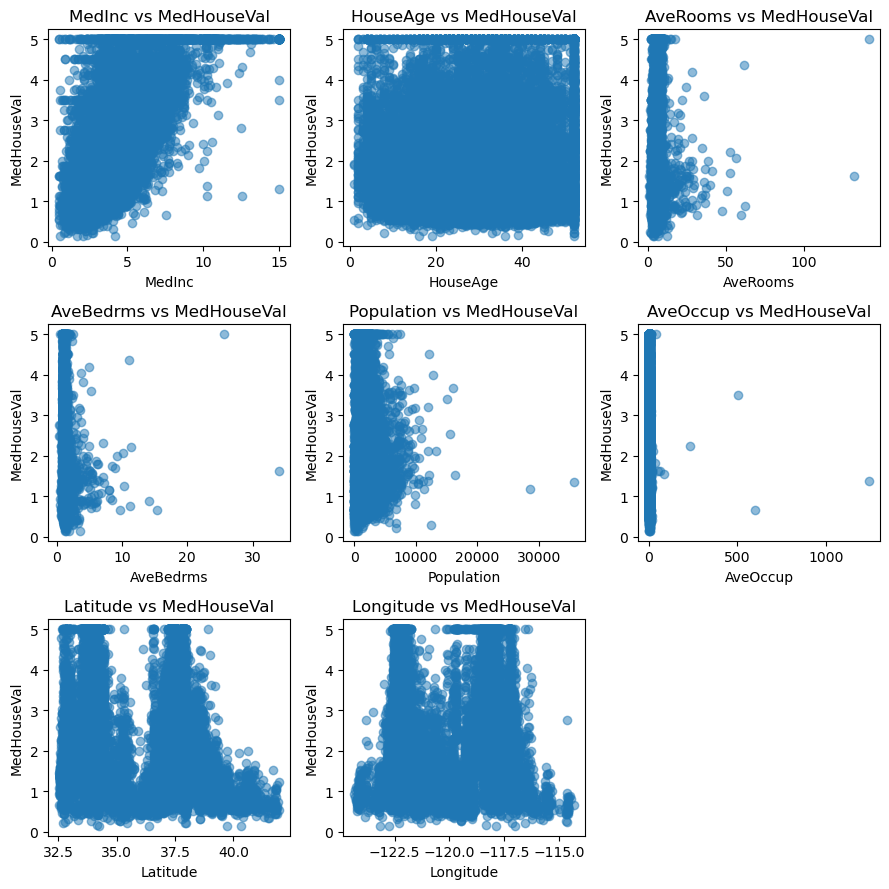

In [5]:
# Define the target variable
target = 'MedHouseVal'
# Number of features (excluding the target)
num_features = len(df.columns) - 1

# Determine the number of rows and columns for subplots
ncols = 3  # Number of columns in the subplot grid
nrows = int(np.ceil(num_features / ncols))  # Number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 3 * nrows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(df.columns[:-1]):  # Exclude the target variable
    ax = axes[i]
    ax.scatter(df[feature], df[target], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    ax.set_title(f'{feature} vs {target}')

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# 2. Linear Regression<a id='2.1'></a>

Objective: Build a regression model to predict the median house value based on various features.

The linear regression model using several libraries, each offering different levels of detail and convenience. The most common libraries for this purpose are statsmodels and scikit-learn. 

In [6]:
# Define features and target variable
# Remove Population due to low t value indicating low significant impact to y
X = df.drop(columns=['MedHouseVal','Population'], axis=1)
y = df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the features (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y_train, X_train).fit()

y_pred = model.predict(X_test)

# Print the summary
print(model.summary())

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          1.980e+04
Date:                Fri, 30 Aug 2024   Prob (F-statistic):                        0.00
Time:                        18:46:57   Log-Likelihood:                         -19200.
No. Observations:               16512   AIC:                                  3.841e+04
Df Residuals:                   16505   BIC:                                  3.847e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Any changes to improve MSE 0.629?

# 2.1 Feature Engineering<a id='2.2'></a>
### Depending on the specific application and goals, we may want to improve the model's performance by exploring additional features, trying different modeling techniques, or refining your existing approach.

In [7]:
# Train and evaluate different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Random Forest': Lasso(alpha=0.1)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} R-squared: {r2_score(y_test, y_pred):.3f}')

Linear Regression R-squared: 0.576
Ridge Regression R-squared: 0.576
Lasso Regression R-squared: 0.805
Random Forest R-squared: 0.532


### Whether an MSE is considered high depends on the context, including the scale of the target variable, comparison to baseline models, and domain expectations.. Let's consider more factors..

In [8]:
# Range of target variable
target_range = y.max() - y.min()
print(f'Target Range: {target_range}')

# Standard deviation of target variable
target_std = y.std()
print(f'Target Standard Deviation: {target_std}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Simple baseline model (predicting the mean value)
baseline_pred = np.mean(y_test)
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))
print(f'Baseline MSE: {baseline_mse}')

Target Range: 4.85002
Target Standard Deviation: 1.1539561587441483
Root Mean Squared Error (RMSE): 0.7933093028081237
Baseline MSE: 1.3104089782408996


## Summary of Fitting Performance

*The RMSE is relatively low compared to the target’s range and standard deviation, indicating that the model’s predictions are reasonably close to the actual values.*

**<font color="green">Improvement Over Baseline!</font>**
*This model's MSE is lower than the baseline MSE, showing that the Lasso model provides an improvement over a simple mean-based prediction.*

### *Whether an MSE is considered high depends on the context, including the scale of the target variable, comparison to baseline models, and domain expectations.*

# 2.1 Cross-Validation to linear regression<a id='2.3'></a>

### Applying to assess the performance and generalizability of the model. Cross-validation helps ensure that the model performs well not just on the training data but also on unseen data, which is crucial for avoiding overfitting.

In [9]:
# Initialize the linear regression model
model = LinearRegression()

# Apply cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
mse_scores = -cv_scores

# Print cross-validation results
print(f'Cross-Validation MSE Scores: {mse_scores}')
print(f'Mean Cross-Validation MSE: {mse_scores.mean()}')
print(f'Standard Deviation of Cross-Validation MSE: {mse_scores.std()}')

Cross-Validation MSE Scores: [0.48449262 0.62192014 0.64309864 0.54149875 0.49478747]
Mean Cross-Validation MSE: 0.5571595246649694
Standard Deviation of Cross-Validation MSE: 0.06480043396470274


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant to the features
X_with_const = sm.add_constant(X_train)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif)


     Feature           VIF
0      const  16870.972927
1     MedInc      2.538037
2   HouseAge      1.113016
3   AveRooms      7.911092
4  AveBedrms      6.608867
5   AveOccup      1.002534
6   Latitude      9.115138
7  Longitude      8.828891


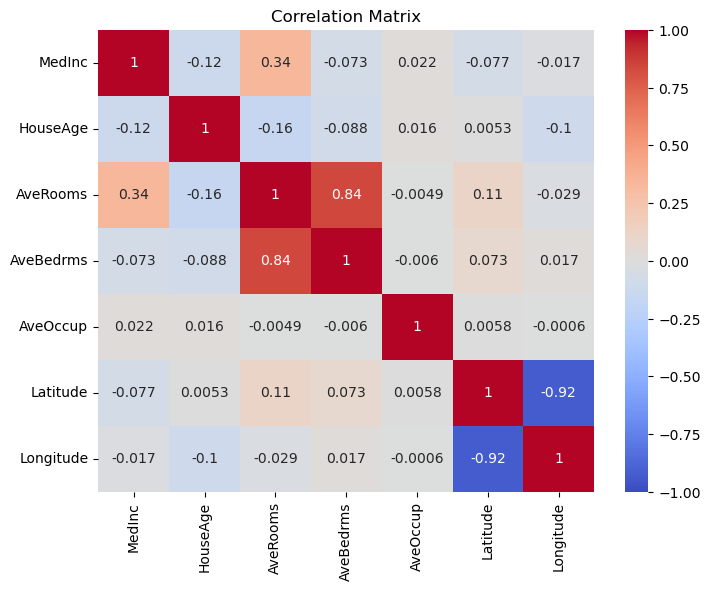

In [11]:
# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot the correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()